# HW 10 CLUSTERING BUSINESS

#cluster time trends in NYC businesses: 
#DATA
#Census Business data:
##download census data for businesses by ZIP code. the data is here
http://www.census.gov/econ/cbp/download/
##and it can be downloaded by hand. you can also download it with 3 terminal commands as follows: the data from 1993 through 2001 is different in the format of its path than the data after 2001 (that is why more than one for loop is needed)



#NYC zip codes shape file is here
##http://data.nycprepared.org/dataset/nyc-zip-code-tabulation-areas/resource/0c0e14e9-78e1-404e-97b0-c2fabceb3981


NOTES: 
to read in a zip file without unzipping it you can use the pandas and zipfile packages

# 1 Get and prepare the data

In [303]:
import pandas as pd

import zipfile
n = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','94','95','96','97','98','99']

fname0 = 'zbp{0}totals.zip'
zf={}
df={}
for i in range(len(n)):
    fname = fname0.format(n[i])
    zf[i] = zipfile.ZipFile(fname)
    df[n[i]] = pd.read_csv(zf[i].open(fname.replace('.zip','.txt')))


In [304]:
# In some files, the column names are in uppercase while some are in lowercase.
# We switch the uppercase letters to lowercase ones.

# EST: Total number of establishments

for i in n:
    if 'ZIP' in list(df[i].columns.values):
        df[i]=df[i].rename(columns = {'ZIP':'zip'})
        df[i]=df[i].rename(columns = {'EST':'est'})

In [305]:
import json
with open('nyc-zip-code-tabulation-areas-polygons.geojson') as data_file:    
    data = json.load(data_file)
nyc_zip = []
for department in data['features']:
    nyc_zip.append(int(department['properties']["postalCode"]))

In [306]:
len(nyc_zip)

262

In [307]:
# The third and fourth digit of the year are the labels of each dataframe.

df[str(1994)[2:]]['zip'][3002]

10037

In [308]:
# Remove those zipcodes that may not appear in files of all years
for kantou in range(5):
    for i in nyc_zip:
        for num in range(1994,2014):
            if i not in list(df[str(num)[2:]]['zip']):
                if i in nyc_zip:
                    print i, 'is not in', num
                    nyc_zip.remove(i)

83 is not in 1994
11109 is not in 1994
11251 is not in 1995
10048 is not in 2008
10096 is not in 2004
10196 is not in 1995
10196 is not in 1996
10265 is not in 2002
10047 is not in 1999
10047 is not in 2008
10203 is not in 1995
10260 is not in 2012
10065 is not in 1994
10069 is not in 1994
10097 is not in 1994
10045 is not in 1999
10259 is not in 1994
10075 is not in 1994
10275 is not in 1997


In [309]:
10045 not in list(df[str(1999)[2:]]['zip'])

True

In [310]:
len(nyc_zip)

243

In [311]:
import numpy as np

In [312]:
mydata = np.zeros([243,20])

In [313]:
# Put the data in a 2-dimensinal array (matrix).

for i in range(243):
    for j in range(20):
        ntmp = str(j+1994)[2:]
        mydata[i][j] = df[ntmp]['est'][list(df[ntmp]['zip']).index(nyc_zip[i])]

In [314]:
mydata

array([[  1.22900000e+03,   1.23600000e+03,   1.29200000e+03, ...,
          1.64700000e+03,   1.72400000e+03,   1.75900000e+03],
       [  1.94000000e+02,   1.88000000e+02,   1.76000000e+02, ...,
          2.22000000e+02,   2.41000000e+02,   2.41000000e+02],
       [  1.42200000e+03,   1.41400000e+03,   1.33500000e+03, ...,
          1.48800000e+03,   1.51000000e+03,   1.53900000e+03],
       ..., 
       [  2.24000000e+02,   2.27000000e+02,   2.20000000e+02, ...,
          3.01000000e+02,   2.98000000e+02,   3.06000000e+02],
       [  6.08000000e+02,   6.23000000e+02,   6.16000000e+02, ...,
          1.61000000e+02,   1.28000000e+02,   1.25000000e+02],
       [  1.00000000e+00,   1.00000000e+00,   1.10000000e+01, ...,
          1.76000000e+02,   1.60000000e+02,   1.70000000e+02]])

In [315]:
# Standardize the data

for i in range(243):
    mydata[i] = (mydata[i]-np.mean(mydata[i]))/np.std(mydata[i])

In [316]:
import matplotlib.pyplot as plt
%matplotlib inline

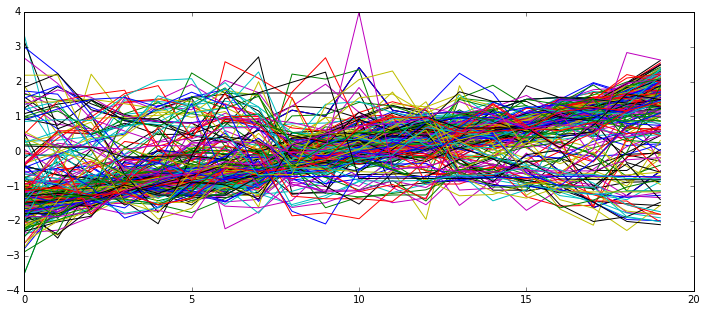

In [317]:
plt.figure(figsize=(12,5))
for i in range(243):
    plt.plot(mydata[i])

# 2 Cluster the NUMBER OF ESTABLISHMENTS time series with K-means

In [318]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [319]:
color = ['red', 'blue', 'green', 'pink', 'purple']

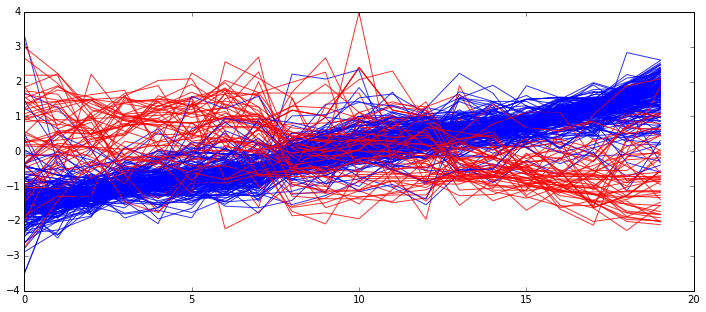

In [320]:
# Try with cluster number 2

est=KMeans(n_clusters=2,n_init=100)
est.fit(mydata)
labels=est.labels_

plt.figure(figsize=(12,5))
for i in range(243):
    plt.plot(mydata[i],c=color[labels[i]],alpha=0.8)

2 clusters: 0.561053058711
3 clusters: 0.536635291901
4 clusters: 0.500035702586
5 clusters: 0.271486011046
6 clusters: 0.227938721498
7 clusters: 0.151154030461
8 clusters: 0.191591195636
9 clusters: 0.258670105583
10 clusters: 0.188199763852
11 clusters: 0.182786897029
Best for 2 clusters: 0.561053058711


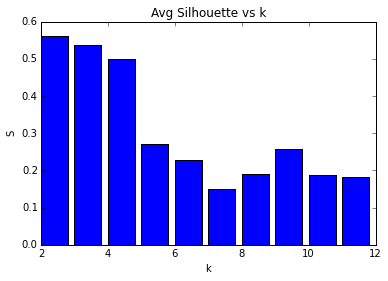

In [321]:
#perform the clustering for 10 different values of k from 2 to 11, compute the average 
#Silhouette score for each and pick up the k maximizing an average Silhouette score

s=[0]*10
for k in range(0,10):
    est=KMeans(n_clusters=k+2,n_init=25)
    est.fit(mydata)
    s[k]=silhouette_score(mydata, est.labels_)
    print('{0} clusters: {1}'.format(k+2,s[k]))
k=np.argmax(s)    
est=KMeans(n_clusters=k+2,n_init=100)
est.fit(mydata)
labels=est.labels_
plt.figure()
plt.bar(range(2,12),s)
plt.xlabel('k')
plt.ylabel('S')
plt.title('Avg Silhouette vs k')
print('Best for {0} clusters: {1}'.format(k+2,silhouette_score(mydata, labels)))

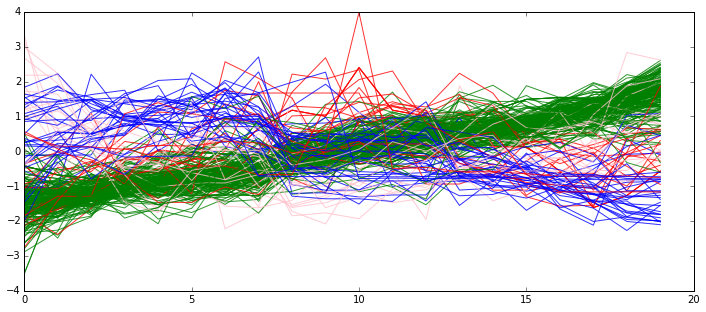

In [331]:
# Choose cluster=4, cluster and visualize

est=KMeans(n_clusters=4,n_init=100)
est.fit(mydata)
labels=est.labels_

plt.figure(figsize=(12,5))
for i in range(243):
    plt.plot(mydata[i],c=color[labels[i]],alpha=0.8)

# 3 Plot the cluster centers

In [332]:
labels

array([2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 3, 1, 0, 2, 0,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 3, 2, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 1, 3, 0, 3, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 3,
       2, 1, 1, 2, 3, 1, 2, 3, 1, 1, 3, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 3, 3,
       2, 3, 2, 3, 1, 0, 0, 1, 1, 2, 2, 1, 2], dtype=int32)

In [335]:
# Use weighted average to calculate the cluster centers

wtmp = np.zeros((4, 243))
for i in range(243): wtmp[labels[i]][i] = 1
clmeans = [np.average(mydata, axis=0, weights=(wtmp[i])) for i in range(4)]

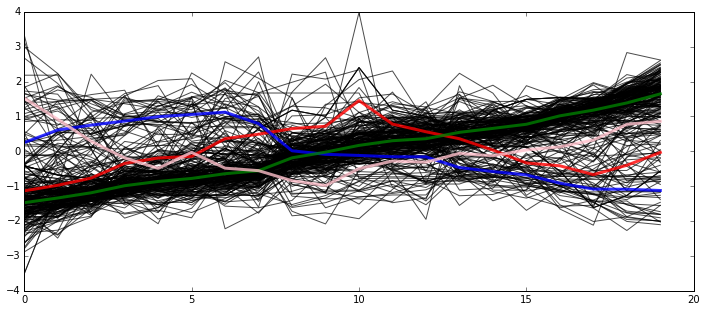

In [336]:
# Visualization of the cluster centers

plt.figure(figsize=(12,5))
for i in range(243):
    plt.plot(mydata[i],c='black',alpha=0.7)
for i in range(4):
    plt.plot(clmeans[i],c=color[i],linewidth=3,alpha=0.8)

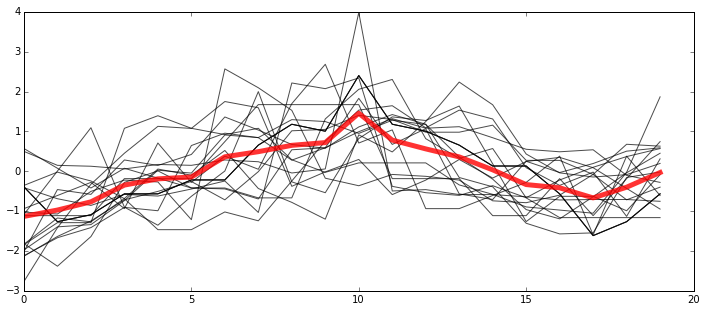

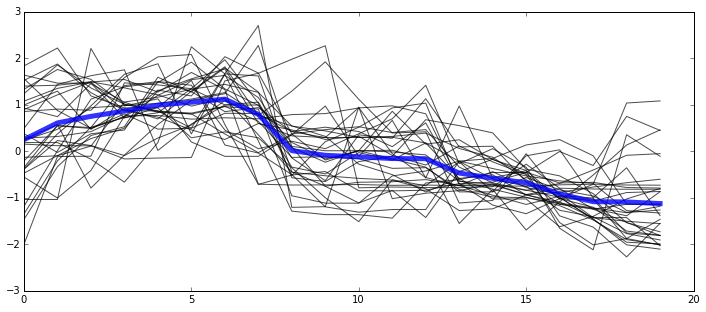

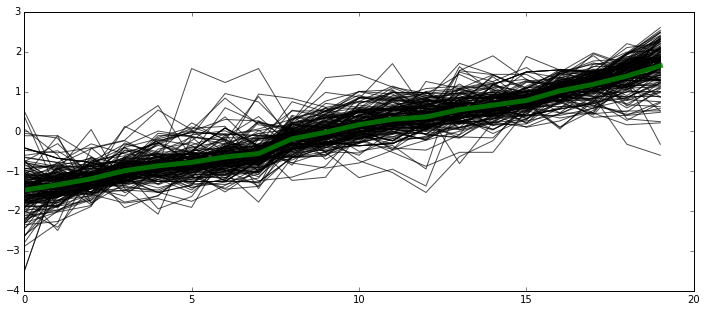

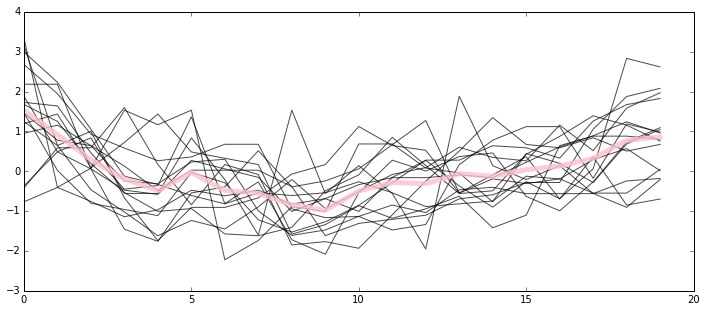

In [337]:
# Visualization of each cluster center
for i in range(4):
    plt.figure(figsize=(12,5))
    for j in range(243):
        if labels[j] == i:
            plt.plot(mydata[j],c='black',alpha=0.7)
    plt.plot(clmeans[i],c=color[i],linewidth=5,alpha=0.8)

# 4 Use another clustering algorithm

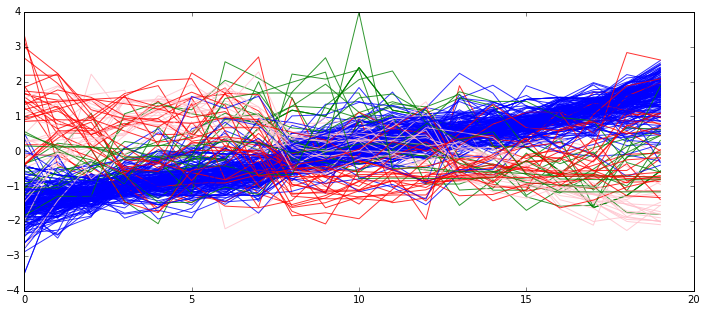

In [338]:
# Try hierarchical clustering

from sklearn.cluster import AgglomerativeClustering
est=AgglomerativeClustering(n_clusters=4)
est.fit(mydata)
labels2=est.labels_

plt.figure(figsize=(12,5))
for i in range(243):
    plt.plot(mydata[i],c=color[labels2[i]],alpha=0.8)

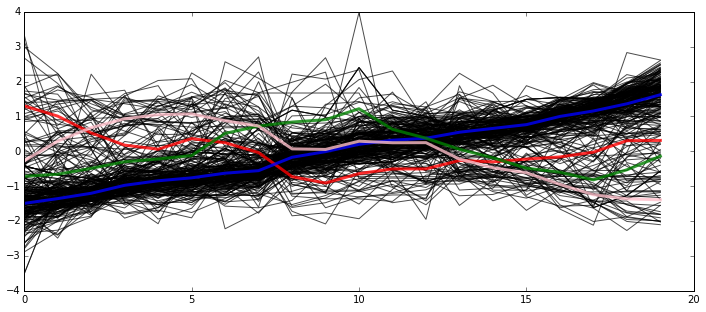

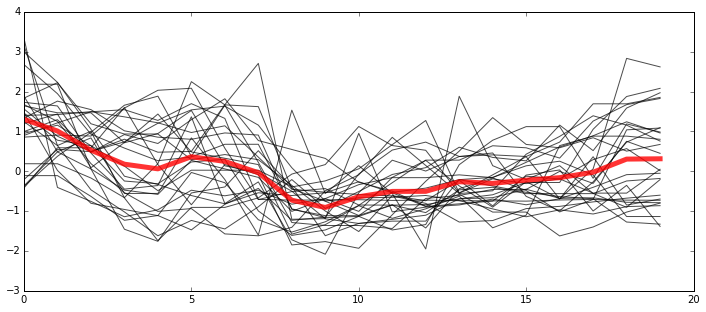

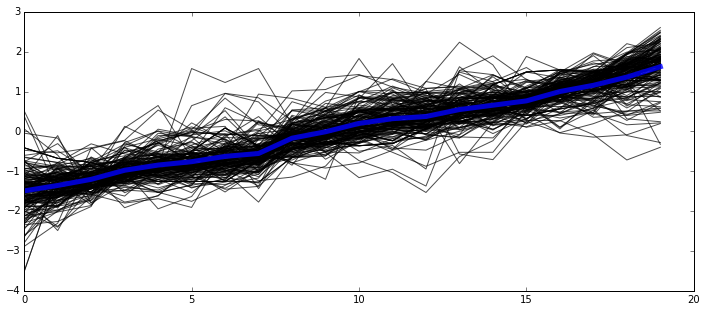

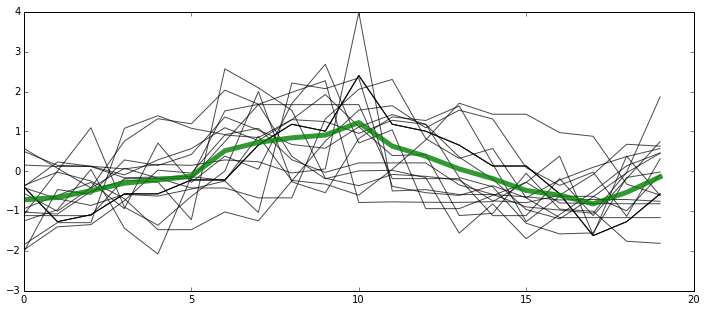

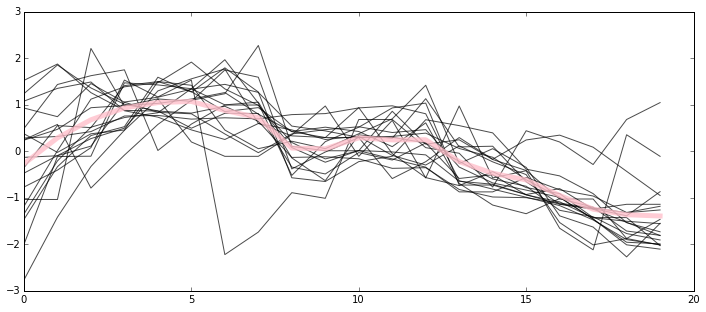

In [339]:
# Visualization of the cluster centers

wtmp = np.zeros((4, 243))
for i in range(243): wtmp[labels2[i]][i] = 1
clmeans = [np.average(mydata, axis=0, weights=(wtmp[i])) for i in range(4)]

plt.figure(figsize=(12,5))
for i in range(243):
    plt.plot(mydata[i],c='black',alpha=0.7)
for i in range(4):
    plt.plot(clmeans[i],c=color[i],linewidth=3,alpha=0.8)
    
for i in range(4):
    plt.figure(figsize=(12,5))
    for j in range(243):
        if labels2[j] == i:
            plt.plot(mydata[j],c='black',alpha=0.7)
    plt.plot(clmeans[i],c=color[i],linewidth=5,alpha=0.8)

# 5 Visualization of the results on NYC map

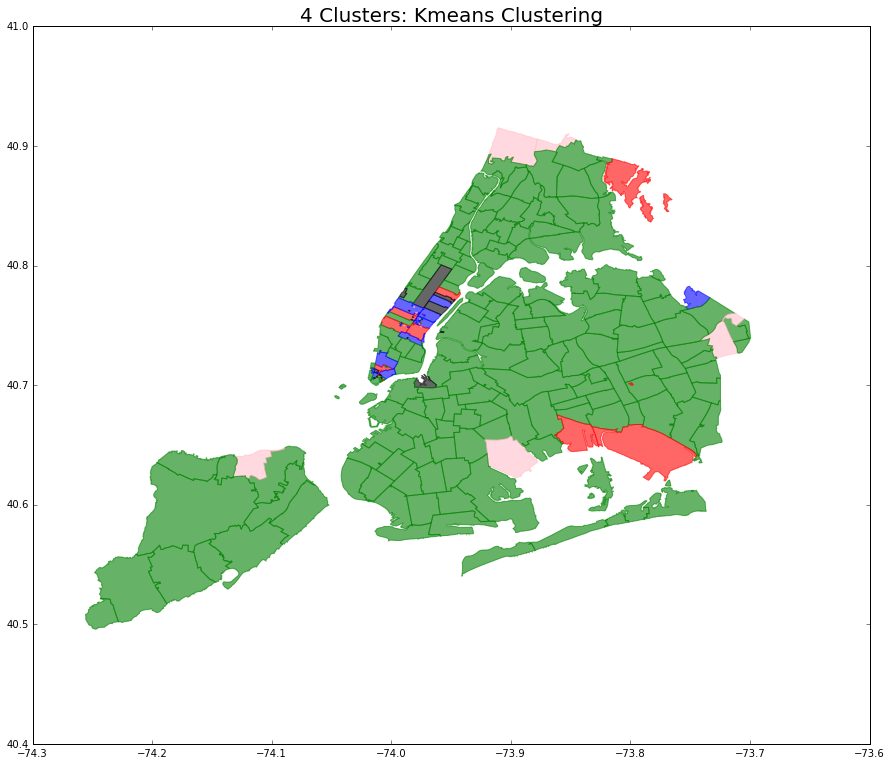

In [340]:
from descartes import PolygonPatch
fig = plt.figure(figsize=(15,15)) 
for i in data['features']:
    poly = i['geometry']
    postcode = str(i['properties']['postalCode'])
    ax = fig.gca()
    if int(postcode) in nyc_zip:
        ind = nyc_zip.index(int(postcode))
        ax.add_patch(PolygonPatch(poly, fc=color[labels[ind]], ec=color[labels[ind]], alpha=0.6, zorder=2 ))
    else:
        ax.add_patch(PolygonPatch(poly, fc='black', ec='black', alpha=0.6, zorder=2 ))
ax.axis('scaled')

plt.title('4 Clusters: Kmeans Clustering', size=20)

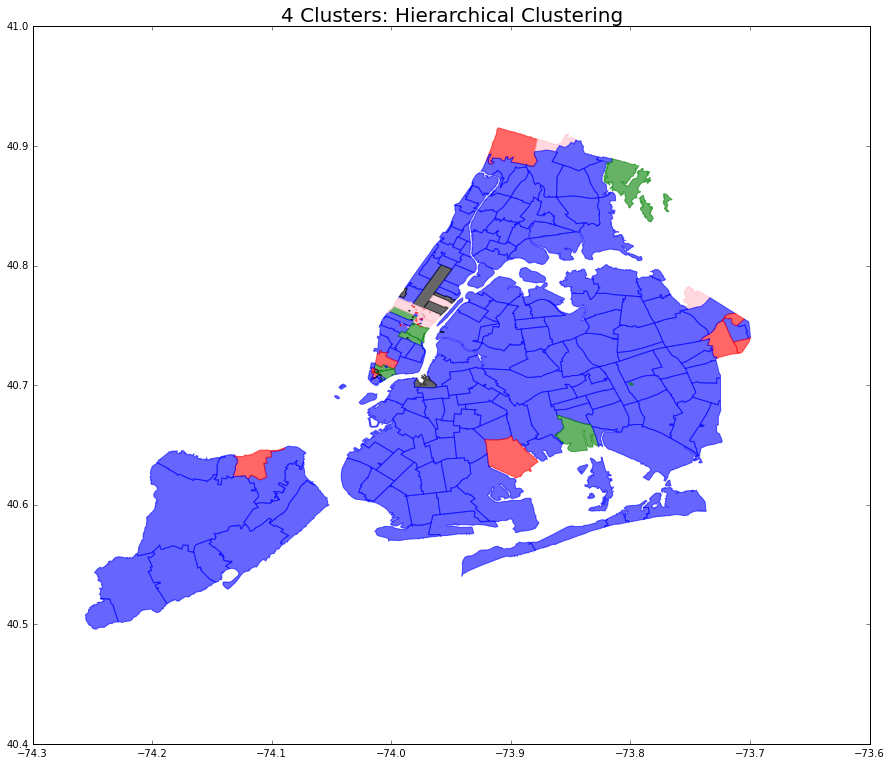

In [341]:
from descartes import PolygonPatch
fig = plt.figure(figsize=(15,15)) 
for i in data['features']:
    poly = i['geometry']
    postcode = str(i['properties']['postalCode'])
    ax = fig.gca()
    if int(postcode) in nyc_zip:
        ind = nyc_zip.index(int(postcode))
        ax.add_patch(PolygonPatch(poly, fc=color[labels2[ind]], ec=color[labels2[ind]], alpha=0.6, zorder=2 ))
    else:
        ax.add_patch(PolygonPatch(poly, fc='black', ec='black', alpha=0.6, zorder=2 ))
ax.axis('scaled')

plt.title('4 Clusters: Hierarchical Clustering', size=20)

# 6 Comparison of the two results

### From the map, we can hardly decide that which clustering method is better. Actually the two results are very similar.

# 7 Attempt an intepretation

### No matter which method we use, it is clear that the time series in center of the city is much more diversified. When doing research about business settings in the city, we can focus more on these areas.

you may need to clean your data: for some NYC zip codes there may be no info
    
sanity check: you should have 20 (Ntimestamps) datapoints per time series and about 250 zipcodes (Nzipcodes)

IMPORTANT: we talked about the importance of "whitening" your data: dividing each feature by its standard deviation. 
Whitenings decorrelates the data: it makes the features independent so that the data covariance matrix is the identity matrix.
Whitening your data in time series analysis is in most cases **wrong**: you are modifying your time behaviour. This is because of the strong correlation between features (two consecutive time stamps for the same observation, the same zip code here, are strongly correlated). Here instead you want to standardize your time series: subtract the mean and divide each time series (separately) by its standard deviation. As a sanity check (if you use skitlearn Kmeans or skitlearns kmeans2): you want your data array to be shaped Nzipcodes x Ntimestamps

mydata.shape should be (Nzipcodes, Ntimestamps)

mydata[i].std() shoould be 1 for all i in range(len(Nzipcodes))

mydata[i].mean() should be ~0 for all i in range(len(Nzipcodes))



TASKS:
    
    1. get and prep your data.
    2. cluster the NUMBER OF ESTABLISHMENTS time series with K-means in **a few** clusters (as discussed there is no real good, sound way to decide what a good number is here. try a few options, keeping in mind a few is more than a couple, but i recommand you stay within the single digit numbers)
    3. plot the cluster centers (if you used K means those are the means of the clusters). you can plot for example the cluster centers overlayed on each time series (using the alpha channel to control the opacity in the plot may be helpful here).
    4. Use another clustering algorithm (of your choice)
    5. overlay your data on a NYC map: you can use shapefiles for the zip codes and different colors for different clusters
    6. Compare the results of the 2 algorithms
    7. attempt an interpretation. this is dangerous ground: clustering is an exploratory tool so you do not want to jump to conclusions because you see some clusters! but seeing structure in your data can inform your next moves as an investigator. 
    